# EDA Notebook

## 1. Importar librerías necesarias
Importar pandas, numpy, matplotlib y seaborn para el análisis y visualización de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath(".."))
from src.cleaning import clean
import src.viz as viz
from src.features import build_features
from src.utils import assert_columns

## 2. Cargar el archivo CSV
Solicitar al usuario la ruta del archivo .csv y cargarlo en un DataFrame de pandas.

In [2]:
# Change this path to point to your data file
file_path = '../data/raw/google_play_store_apps.csv'
df = pd.read_csv(file_path)

## 3. Visualizar las primeras filas del dataset
Mostrar las primeras filas del DataFrame usando head() para obtener una vista general de los datos.

In [3]:
df.head()

,App,Category,Rating,Reviews,Size_MB,Installs,Type,Price_$,Content_Rating,Genres,Last_Updated,Android_Version
0,App_1,HEALTH,3.7,401077,2.5,"1,000,000+ installs",Paid,1.99,Teen,Education,2024-06-05,8.0 and up
1,App_2,LIFESTYLE,5.0,460806,2.5,"10,000+",Free,0.99,Mature 17+,Education,2024-09-14,8.0 and up
2,App_3,ENTERTAINMENT,2.5,4989914,2.5,"10,000,000+",Free,2.99,Teen,Health,2024-06-12,5.0 and up
3,App_4,TOOLS,3.0,1004011,2.5,"1,000+",Free,NaN,Everyone,Action,2024-05-26,4.1 and up
4,App_5,HEALTH,3.5,312033,2.5,"1,000,000+",Free,2.99,Everyone,Health,2024-06-02,4.1 and up


## 4. Explorar información general del dataset
Utilizar info() y shape para mostrar información sobre el número de filas, columnas y tipos de datos.

In [4]:
df.info()
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

df.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              1200 non-null   str    
 1   Category         1200 non-null   str    
 2   Rating           1152 non-null   float64
 3   Reviews          1200 non-null   int64  
 4   Size_MB          1200 non-null   float64
 5   Installs         1200 non-null   str    
 6   Type             1200 non-null   str    
 7   Price_$          1092 non-null   float64
 8   Content_Rating   1200 non-null   str    
 9   Genres           1104 non-null   str    
 10  Last_Updated     1164 non-null   str    
 11  Android_Version  1200 non-null   str    
dtypes: float64(3), int64(1), str(8)
memory usage: 112.6 KB
Número de filas: 1200
Número de columnas: 12


,Rating,Reviews,Size_MB,Price_$
count,1152.000000,1.200000e+03,1200.0,1092.000000
mean,3.738194,2.494315e+06,2.5,2.132967
std,0.723251,1.453801e+06,0.0,1.696824
min,2.500000,4.148000e+03,2.5,0.000000
25%,3.100000,1.280934e+06,2.5,0.990000
50%,3.800000,2.467298e+06,2.5,1.990000
75%,4.400000,3.766748e+06,2.5,2.990000
max,5.000000,4.999121e+06,2.5,4.990000


In [5]:

df[df['Price_$'] == 0].shape

display(df['Price_$'].value_counts(dropna=False))

Price_$
0.99    252
1.99    212
0.00    212
2.99    209
4.99    207
NaN     108
Name: count, dtype: int64

## 5. Describir variables numéricas y categóricas
Usar describe() para variables numéricas y value_counts() para variables categóricas.

In [6]:
# Numerical variables
df.describe()

display(df["Category"].unique())
display(df["Category"].value_counts())

display(df["Genres"].unique())
display(df["Genres"].value_counts())

display(df["Android_Version"].unique())
display(df["Android_Version"].value_counts())

display(df["Installs"].unique())
display(df["Installs"].value_counts())

display(df["Type"].unique())
display(df["Type"].value_counts())

<StringArray>
[       'HEALTH',     'LIFESTYLE', 'ENTERTAINMENT',         'TOOLS',
     'EDUCATION',     'lifestyle',       'FINANCE',      'BUSINESS',
         'tools',          'GAME',  'PRODUCTIVITY',  'Productivity',
         'ToOls', 'Entertainment',      'business',       'finance',
      'businEsS',     'Lifestyle', 'entertainment',  'pROdUCTIViTy',
        'HEaLth',       'Finance',          'gamE',          'game',
  'prOdUctiviTy',  'productivity',        'health',          'Game',
 'ENTeRTaInMEnt',     'Education',        'heAlTH',       'fINAncE',
      'Business',        'Health',       'FiNanCE', 'EnterTaINmENt',
     'EduCAtION',         'Tools',     'liFEstYLE',     'LIfESTYlE',
     'education',     'eDUcATion',        'HEaLTh', 'enTERtAinMeNT',
       'FiNANCE',          'GAme',     'lifESTYLe',      'busiNEsS',
  'ProducTivITy',     'EDucaTioN',     'liFeStylE', 'eNteRTaInmEnt',
     'lIFeStylE',      'busINEsS',      'bUSiNEsS',      'buSINeSS',
     'eduCATioN',   

Category
GAME             138
EDUCATION        127
TOOLS            124
ENTERTAINMENT    112
HEALTH           110
                ... 
HealTh             1
ENTERTAiNMEnt      1
eDUcatIoN          1
EntERTAiNMENt      1
heALTh             1
Name: count, Length: 65, dtype: int64

<StringArray>
['Education', 'Health', 'Action', nan, 'Tools', 'Music', 'Puzzle', 'Business']
Length: 8, dtype: str

Genres
Action       193
Education    168
Music        163
Tools        153
Puzzle       146
Business     141
Health       140
Name: count, dtype: int64

<StringArray>
['8.0 and up', '5.0 and up', '4.1 and up', '6.0 and up']
Length: 4, dtype: str

Android_Version
8.0 and up    333
5.0 and up    296
4.1 and up    293
6.0 and up    278
Name: count, dtype: int64

<StringArray>
[ '1,000,000+ installs',              '10,000+',          '10,000,000+',
               '1,000+',           '1,000,000+',            '1,000,000',
             '100,000+',           '10,000,000',              'unknown',
     '10,000+ installs',               '10000+', '10,000,000+ installs',
              '100000+',    '100,000+ installs',              '100,000',
                '1000+',             '1000000+',                '1,000',
               '10,000',            '10000000+',      '1,000+ installs']
Length: 21, dtype: str

Installs
1,000,000+              224
100,000+                220
10,000,000+             215
10,000+                 209
1,000+                  192
unknown                  34
1,000,000+ installs      12
1,000,000                11
10,000,000+ installs     10
10,000+ installs          9
1,000                     9
100,000                   8
10,000                    8
10,000,000                6
100000+                   6
1000000+                  6
10000+                    5
100,000+ installs         5
1000+                     5
10000000+                 4
1,000+ installs           2
Name: count, dtype: int64

<StringArray>
['Paid', 'Free']
Length: 2, dtype: str

Type
Free    1017
Paid     183
Name: count, dtype: int64

## 6. Visualizar valores nulos y duplicados
Identificar y visualizar la cantidad de valores nulos y filas duplicadas en el dataset.

In [7]:
# Hay nulos D:
display(df.isnull().sum())

# No hay duplicados :D
display(df.duplicated().sum())

App                  0
Category             0
Rating              48
Reviews              0
Size_MB              0
Installs             0
Type                 0
Price_$            108
Content_Rating       0
Genres              96
Last_Updated        36
Android_Version      0
dtype: int64

np.int64(0)

In [8]:
display(df['Rating'].max())
display(df['Rating'].min())

display(df['Price_$'].max())
display(df['Price_$'].min())
display(df['Price_$'].value_counts())

display(df['Last_Updated'])
display(df["Last_Updated"].isna().mean())


np.float64(5.0)

np.float64(2.5)

np.float64(4.99)

np.float64(0.0)

Price_$
0.99    252
1.99    212
0.00    212
2.99    209
4.99    207
Name: count, dtype: int64

0       2024-06-05
1       2024-09-14
2       2024-06-12
3       2024-05-26
4       2024-06-02
           ...    
1195    2024-06-22
1196    2024-08-19
1197    2024-09-26
1198    2024-12-27
1199    2024-08-09
Name: Last_Updated, Length: 1200, dtype: str

np.float64(0.03)

In [ ]:
assert_columns(df, [
    'App', 'Category', 'Rating', 'Reviews',
    'Size_MB', 'Installs', 'Type', 'Price_$',
    'Content_Rating', 'Genres',
    'Last_Updated', 'Android_Version'
])

df_filtered = clean(df)

assert_columns(df, [
    'Android_Version',
    'Last_Updated',
    'Rating'
])

df_cleaned = build_features(df_filtered)

assert_columns(df_cleaned, [
    'Android_Version_Major',
    'Last_Updated_Year',
    'Last_Updated_Month',
    'Rating_Group',
])

display(df_cleaned.sample(10))

,App,Category,Rating,Reviews,Installs,Type,Price_$,Content_Rating,Genres,Last_Updated,Android_Version,Android_Version_Major,Last_Updated_Year,Last_Updated_Month,Rating_Group
1178,App_1179,EDUCATION,3.2,4022271,10000000,Free,0.00,Mature 17+,UNKNOWN,2024-06-13,8.0 and up,8.0,2024,6,Mid
68,App_69,PRODUCTIVITY,4.7,1500958,10000,Free,0.00,Mature 17+,ACTION,2024-12-08,8.0 and up,8.0,2024,12,Top
709,App_710,HEALTH,2.6,3792834,1000000,Free,0.00,Everyone,UNKNOWN,2024-05-07,6.0 and up,6.0,2024,5,Mid
467,App_468,HEALTH,3.6,2575518,10000,Free,0.00,Everyone,MUSIC,2024-12-21,5.0 and up,5.0,2024,12,High
196,App_197,ENTERTAINMENT,3.8,2299909,10000,Free,0.00,Everyone,PUZZLE,2024-04-06,4.1 and up,4.1,2024,4,High
554,App_555,ENTERTAINMENT,3.4,3636572,1000,Free,0.00,Teen,BUSINESS,2024-09-10,5.0 and up,5.0,2024,9,Mid
591,App_592,PRODUCTIVITY,4.3,1203930,10000,Free,0.00,Mature 17+,EDUCATION,2024-08-22,8.0 and up,8.0,2024,8,High
77,App_78,EDUCATION,4.8,3714389,1000000,Free,0.00,Mature 17+,BUSINESS,2024-06-02,6.0 and up,6.0,2024,6,Top
46,App_47,ENTERTAINMENT,2.8,1353334,100000,Free,0.00,Everyone,ACTION,2024-08-08,5.0 and up,5.0,2024,8,Mid
251,App_252,HEALTH,2.8,1618973,100000,Paid,2.99,Everyone,MUSIC,2024-10-07,4.1 and up,4.1,2024,10,Mid


In [10]:
display(df_cleaned['Last_Updated'])
# Ver porcentaje de nulos
display(df_cleaned["Last_Updated"].isna().mean())
# Como el % de nulos es bajo()3%, podemos eliminar las filas con nulos en esta columna

# como podemos ver en el info se han eliminado los nulos de Last_Updated y ya no hay nulos entre los datos
display(df_cleaned.info())
display(df_cleaned.isna().sum())

0      2024-06-05
1      2024-09-14
2      2024-06-12
3      2024-05-26
4      2024-06-02
          ...    
1194   2024-03-13
1196   2024-08-19
1197   2024-09-26
1198   2024-12-27
1199   2024-08-09
Name: Last_Updated, Length: 1131, dtype: datetime64[us]

np.float64(0.0)

<class 'pandas.DataFrame'>
Index: 1131 entries, 0 to 1199
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   App                    1131 non-null   str           
 1   Category               1131 non-null   str           
 2   Rating                 1131 non-null   float64       
 3   Reviews                1131 non-null   int64         
 4   Installs               1131 non-null   int64         
 5   Type                   1131 non-null   str           
 6   Price_$                1131 non-null   float64       
 7   Content_Rating         1131 non-null   str           
 8   Genres                 1131 non-null   str           
 9   Last_Updated           1131 non-null   datetime64[us]
 10  Android_Version        1131 non-null   str           
 11  Android_Version_Major  1131 non-null   float64       
 12  Last_Updated_Year      1131 non-null   int32         
 13  Last_Updated_Month 

None

App                      0
Category                 0
Rating                   0
Reviews                  0
Installs                 0
Type                     0
Price_$                  0
Content_Rating           0
Genres                   0
Last_Updated             0
Android_Version          0
Android_Version_Major    0
Last_Updated_Year        0
Last_Updated_Month       0
Rating_Group             0
dtype: int64

In [11]:
df_cleaned.sample(10)
df_cleaned['Type'].value_counts()

Type
Free    956
Paid    175
Name: count, dtype: int64

## 7. Análisis univariado de variables numéricas
Realizar histogramas y boxplots para analizar la distribución de las variables numéricas.

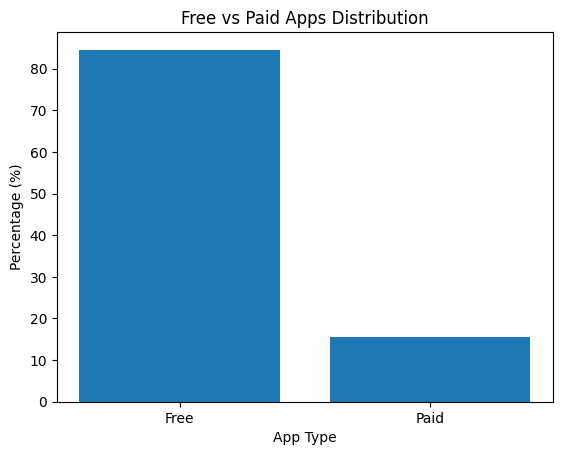

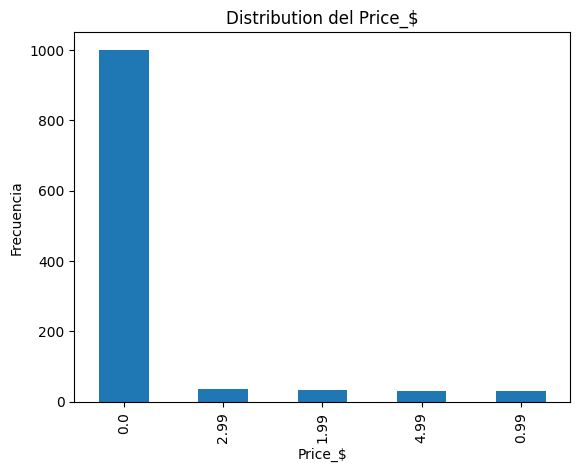

In [12]:
viz.bar_graph_price_proportion(df_cleaned)
viz.hist_grapg(df_cleaned, 'Price_$')

## 8. Análisis univariado de variables categóricas
Realizar gráficos de barras para analizar la frecuencia de las variables categóricas.

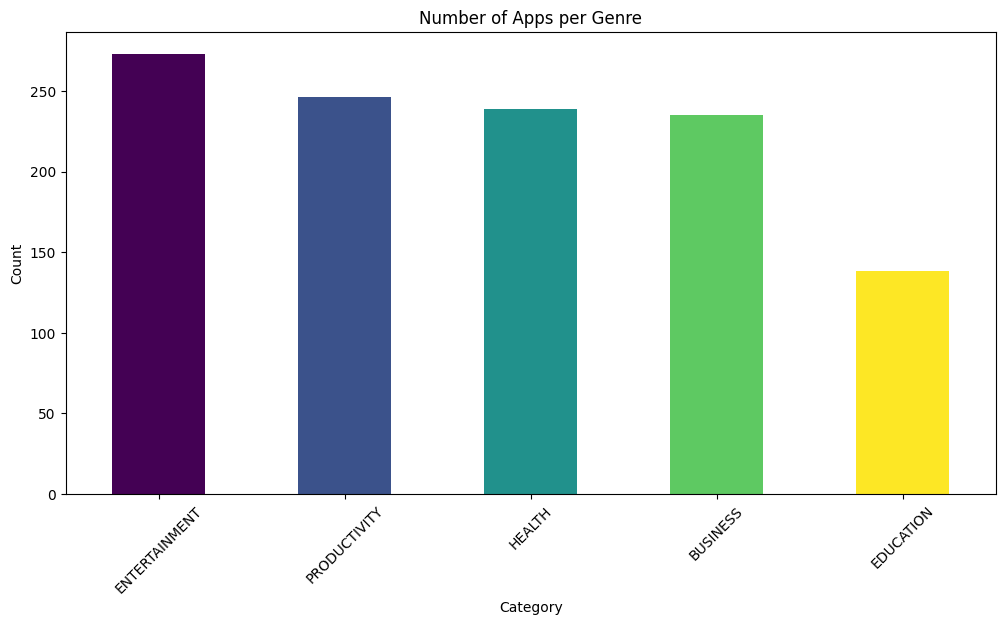

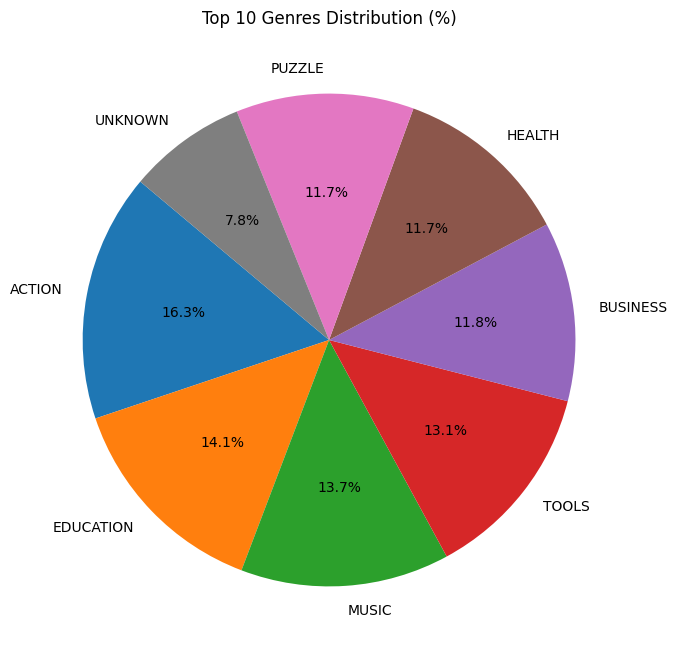

In [13]:
viz.apps_per_genre(df_cleaned)
viz.genre_distribution(df_cleaned)

## 9. Análisis bivariado entre variables
Explorar relaciones entre variables numéricas y categóricas mediante scatterplots y tablas cruzadas.

c:\Users\imsmo\Documents\Evolve\pyproject\src\viz.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Genres', y='Price_$', palette='pastel')


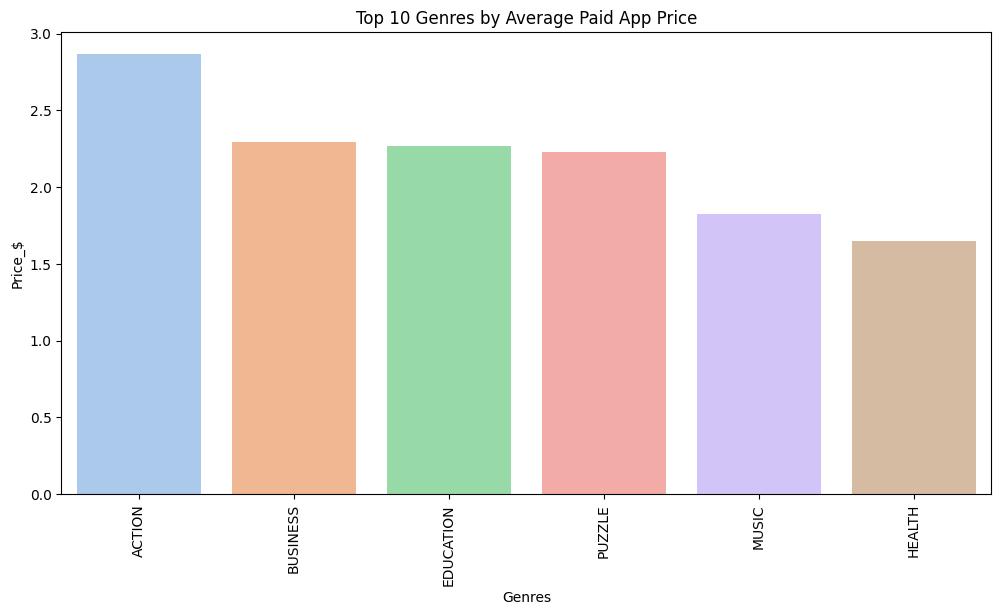

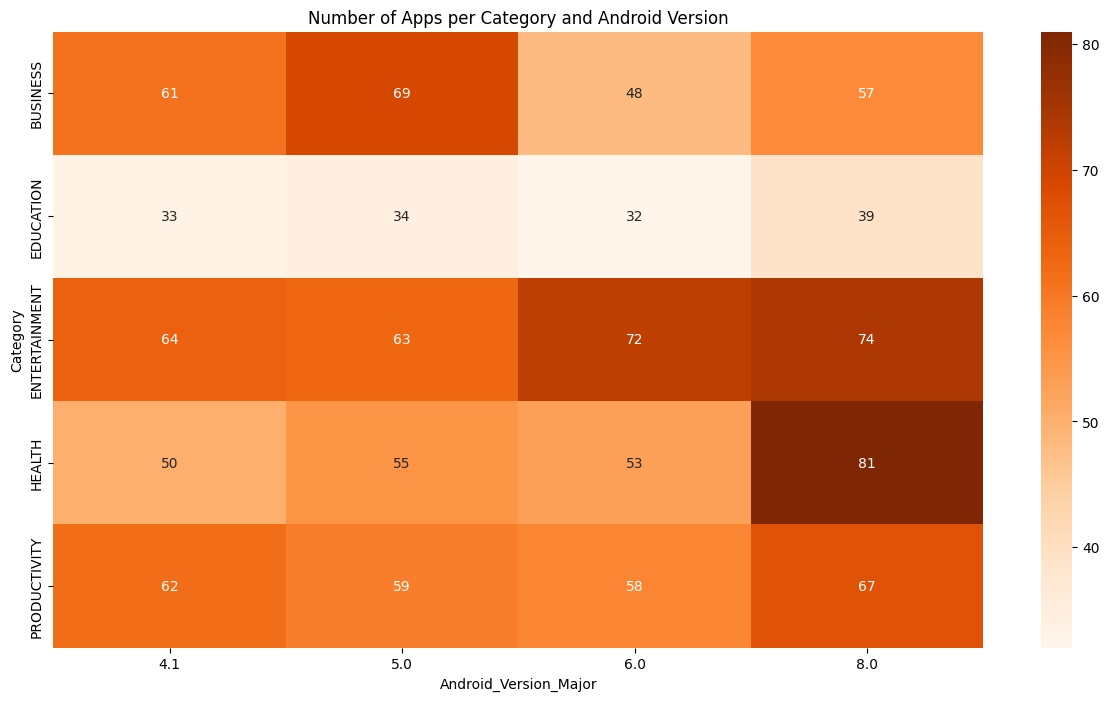

c:\Users\imsmo\Documents\Evolve\pyproject\src\viz.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=installs_df, x='Android_Version_Major', y='Percent', palette='pastel')


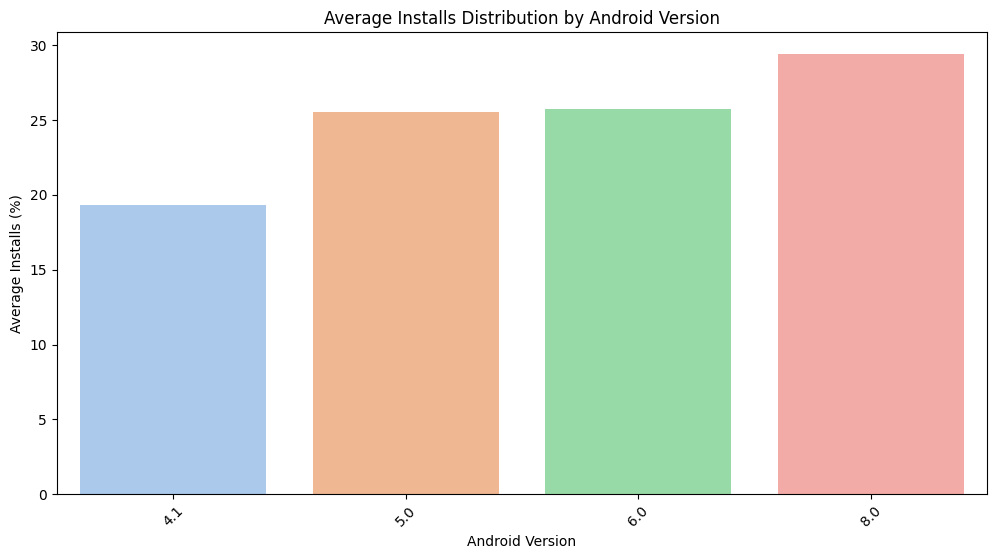

c:\Users\imsmo\Documents\Evolve\pyproject\src\viz.py:101: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


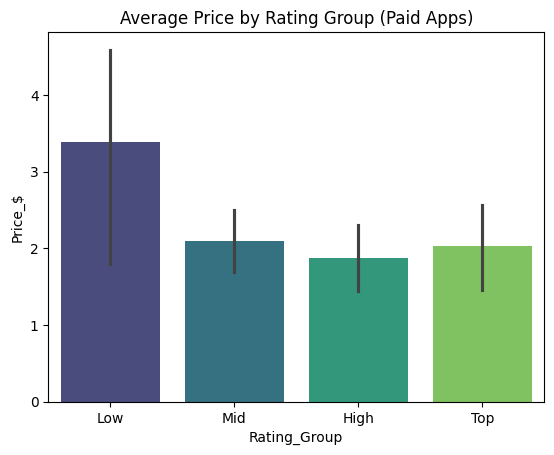

In [14]:
viz.genre_by_avg_paid_app_price(df_cleaned)

viz.heatmap_category_android_version(df_cleaned)

viz.avg_installs_by_android_version(df_cleaned)

viz.avg_paid_price_rating_group(df_cleaned)

In [15]:
display(pd.crosstab(df_cleaned['Category'], df_cleaned['Type'], normalize='index') * 100)
display(pd.crosstab(df_cleaned['Category'], df_cleaned['Content_Rating']))

Type,Free,Paid
Category,,
BUSINESS,82.978723,17.021277
EDUCATION,82.608696,17.391304
ENTERTAINMENT,84.249084,15.750916
HEALTH,85.355649,14.644351
PRODUCTIVITY,86.585366,13.414634


Content_Rating,Everyone,Mature 17+,Teen
Category,,,
BUSINESS,76,82,77
EDUCATION,59,42,37
ENTERTAINMENT,95,81,97
HEALTH,81,82,76
PRODUCTIVITY,79,73,94


In [16]:
viz.crosstab_viz(df_cleaned, 'Category', 'Type')
viz.crosstab_viz(df_cleaned, 'Category', 'Content_Rating')

Type               Free      Paid
Category                         
BUSINESS       0.829787  0.170213
EDUCATION      0.826087  0.173913
ENTERTAINMENT  0.842491  0.157509
HEALTH         0.853556  0.146444
PRODUCTIVITY   0.865854  0.134146 + 

Content_Rating  Everyone  Mature 17+      Teen
Category                                      
BUSINESS        0.323404    0.348936  0.327660
EDUCATION       0.427536    0.304348  0.268116
ENTERTAINMENT   0.347985    0.296703  0.355311
HEALTH          0.338912    0.343096  0.317992
PRODUCTIVITY    0.321138    0.296748  0.382114 + 

